We are working with the unemplyment data from Federal Reserve Bank = https://fred.stlouisfed.org/series/M0892BUSM156SNBR
We will be using simple visualisation to study the data
The data contains 2 columns 
1) date - yyyy-mm-dd format
2) value - in percentages


In [52]:
import pandas as pd

In [53]:
unrate = pd.read_csv('/Users/Suha/Projects/TestGitHub/Unemployment/MonthlyUnemployment.csv')

In [54]:
#change the column names to a proper name and format
unrate.columns = ['date', 'value']

unrate.dtypes
# the date is not a date type. Let us convert it into on 

unrate["date"] = pd.to_datetime(unrate["date"])
unrate.head(12)

# lets us look at the value column
unrate["value"].value_counts().sort_index()
unrate.shape
# we notice the value '.' which we will remove and convert the column into float
unrate

,date,value
0,1940-01-01,15.53
1,1940-02-01,.
2,1940-03-01,15.03
3,1940-04-01,15.82
4,1940-05-01,15.50
5,1940-06-01,13.38
6,1940-07-01,14.11
7,1940-08-01,14.94
8,1940-09-01,13.32
9,1940-10-01,14.76


 we notice the value '.' which we will remove and convert the column into float. We will drop the row wiht the value "." as we do not know a proper imputation for the value and as the value does not mean a 0.

In [55]:
unrate= unrate.loc[unrate["value"] != '.', :].sort_values(by = 'date')
unrate["value"] = unrate["value"].astype(float)
unrate["value"].dtypes


dtype('float64')

In [56]:
#importing matplotlib
import matplotlib.pyplot as plt

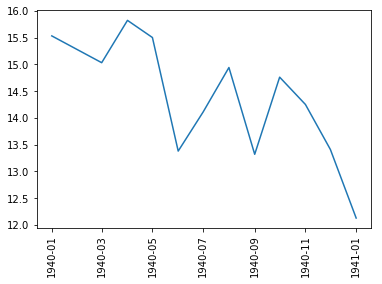

In [57]:

x_values = unrate["date"].head(12)
y_values = unrate["value"].head(12)
plt.plot(x_values, y_values)
plt.xticks(rotation = 90)
plt.show()



Lets us make a function that takes 12 successive date and value given the starting date

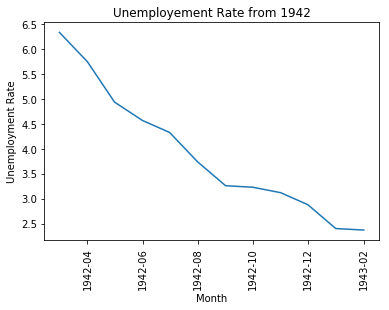

In [82]:
def plot_from(some_date):
    selected_unrate = unrate[unrate["date"] >= some_date].head(12)
    return selected_unrate

plt.plot(plot_from('1942-02-02')["date"], plot_from('1942-02-02')["value"])
plt.xticks(rotation = 90)
plt.xlabel("Month")
plt.ylabel("Unemployment Rate")
plt.title("Unemployement Rate from 1942")
plt.show()

Let us look at 12 months of unemployement data from 1940 to 1946

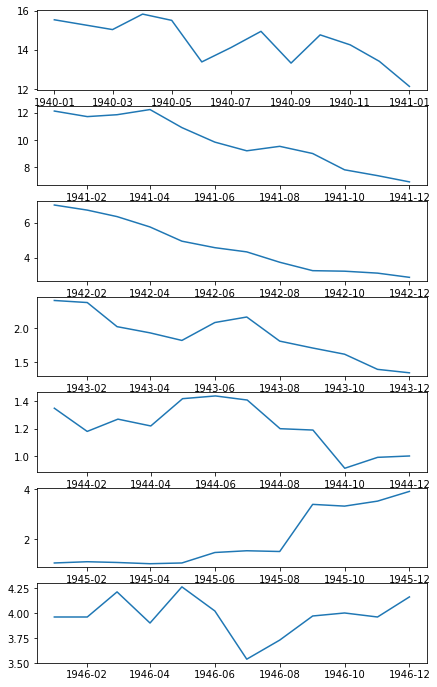

In [83]:

fig = plt.figure(figsize = ( 7 , 12)) # this lets us play with the width and the height of the container
ax1 = fig.add_subplot(7,1,1)
ax2 = fig.add_subplot(7,1,2)
ax3 = fig.add_subplot(7,1,3)
ax4 = fig.add_subplot(7,1,4)
ax5 = fig.add_subplot(7,1,5)
ax6 = fig.add_subplot(7,1,6)
ax7 = fig.add_subplot(7,1,7)
ax1.plot(plot_from('1940-01-01')["date"], plot_from('1940-01-01')["value"])
ax2.plot(plot_from('1941-01-01')["date"], plot_from('1941-01-01')["value"])
ax3.plot(plot_from('1942-01-01')["date"], plot_from('1942-01-01')["value"])
ax4.plot(plot_from('1943-01-01')["date"], plot_from('1943-01-01')["value"])
ax5.plot(plot_from('1944-01-01')["date"], plot_from('1944-01-01')["value"])
ax6.plot(plot_from('1945-01-01')["date"], plot_from('1945-01-01')["value"])
ax7.plot(plot_from('1946-01-01')["date"], plot_from('1946-01-01')["value"])
plt.show()


In the above method, we are visually scanning the table data again and again to represent in the graph. This comes at a cost. A more efficient way would be to extract the month from years and plot it on the same axis. To do this, we will extract month from the date columns 

In [70]:
unrate["month"] = unrate["date"].dt.month
unrate.head()

,date,value,month
0,1940-01-01,15.53,1
2,1940-03-01,15.03,3
3,1940-04-01,15.82,4
4,1940-05-01,15.50,5
5,1940-06-01,13.38,6


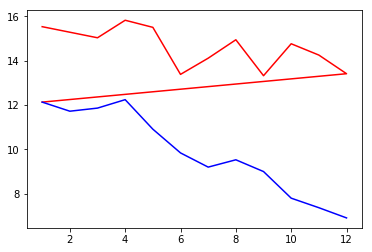

In [84]:
# calling plt.plot() multiple times
plt.plot(plot_from('1940-01-01')["month"], plot_from('1940-01-01')["value"], c = 'red')
plt.plot(plot_from('1941-01-01')["month"], plot_from('1941-01-01')["value"], c= 'blue')
plt.show()

# here for the year of 1940, the data for the second month is missing. Therefore going forward, 
# we will use the slicing option for that year.

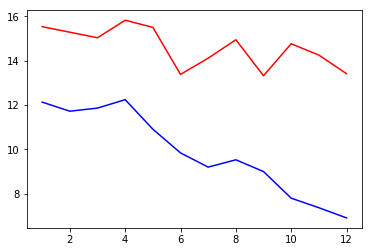

In [76]:
# same plot using dataframe slicing
plt.plot(unrate[0:11]["month"], unrate[0:11]["value"], c = 'red')
plt.plot(unrate[11:23]["month"], unrate[11:23]["value"], c = 'blue')
plt.show()

Now let us use this technique and plot the data for all 6 years

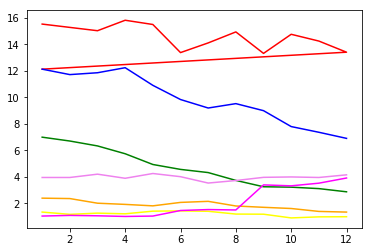

In [80]:
plt.plot(unrate[0:11]["month"], unrate[0:11]["value"], c = 'red') # As the data for the second month is missing
plt.plot(plot_from('1941-01-01')["month"], plot_from('1941-01-01')["value"], c= 'blue')
plt.plot(plot_from('1942-01-01')["month"], plot_from('1942-01-01')["value"], c= 'green')
plt.plot(plot_from('1943-01-01')["month"], plot_from('1943-01-01')["value"], c= 'orange')
plt.plot(plot_from('1944-01-01')["month"], plot_from('1944-01-01')["value"], c= 'yellow')
plt.plot(plot_from('1945-01-01')["month"], plot_from('1945-01-01')["value"], c= 'magenta')
plt.plot(plot_from('1946-01-01')["month"], plot_from('1946-01-01')["value"], c= 'violet')
plt.show()

As noticed from above we are using the same line of code repetitively. This presents a chance for looping. 

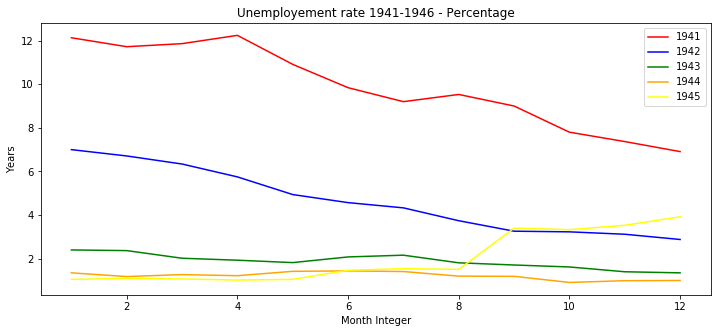

In [152]:
import numpy as np
fig = plt.figure(figsize = (12,5))
colors = ['dummy','red', 'blue', 'green', 'orange', 'yellow', 'megenta', 'violet']

# we will omit the data from 1940 as the second month data is missing
for i in np.arange(1,6):
    start_index = i*12 -1
    end_index = (i+1)*12 -1
    data_slice = unrate[start_index:end_index]
    label = str(1940+i)
    plt.plot(data_slice["month"], data_slice["value"], c = colors[i], label = label)

plt.legend(loc='upper right')    

plt.xlabel('Month Integer')
plt.ylabel('Years')
plt.title("Unemployement rate 1941-1946 - Percentage")

plt.show()
    